# 🎨🌞 Albedo Experiment

### Originally created by Dr. A. Denvil-Sommer (NCAS, Univerity of Reading).

## 🌊 Ocean Albedo and Climate Sensitivity

The surface albedo of the global ocean is a critical factor in Earth’s climate system. Even small changes in ocean albedo can significantly alter the global energy budget, which in turn impacts atmospheric circulation, ocean currents, and the hydrological cycle.

Typical ocean albedo values range from 0.06 to 0.10, with lower values near the equator and slightly higher values near the poles due to changes in sun angle and surface roughness.

## 🎯 Objective

Investigate how increasing ocean **albedo (reflectivity)** affects surface temperature and the atmosphere when coupled with land and ocean models in SpeedyWeather.jl.

## 🌊🧪 Ocean Albedo Experiment Setup
We will explore how changes in ocean albedo affect the atmosphere by comparing two simulations:

**🔹 Control Run (Realistic Albedo)**

Although ocean albedo typically varies with latitude, as mentioned above, for the sake of model stability in our control run, we prescribe a uniform ocean albedo of `0.06` across all latitudes.

**🔸 Perturbed Run (High Albedo)**

Now increase the ocean albedo uniformly to examine its impact: `0.16` 

⚠️ Important: Save each simulation to a separate folder or give output files unique names, so you can easily compare results later without overwriting.

## 🔬 🧠 Guiding Questions

- How did the surface temperature respond to increased ocean albedo?

- Do the equator-to-pole temperature gradients change?

- Is there a noticeable impact on precipitation patterns?

- How do atmospheric circulation fields (e.g., zonal wind) respond?

- Can you relate these effects to Earth’s climate sensitivity or feedbacks?

## 💾 Variables to Invistigate 

To investigate the effects of ocean albedo changes, you should save the following variables from your simulation output:

- **🌊 Sea Surface Temperature (SST)**
`simulation.prognostic_variables.ocean.sea_surface_temperature`

- **💧 Specific Humidity**
`simulation.diagnostic_variables.grid.humid_grid`

- **🌬️ Surface Winds (Zonal and Meridional)**
`simulation.diagnostic_variables.grid.u_grid`
`simulation.diagnostic_variables.grid.v_grid`

- **🌧️ Precipitation (Large-scale)**
`simulation.diagnostic_variables.physics.precip_large_scale`

- **📉 Pressure Tendency (for Hadley Cell analysis)**
`simulation.diagnostic_variables.tendencies.pres_tend`

👉 You may also consider saving additional variables depending on the focus of your analysis.

In [1]:
using SpeedyWeather
using Dates
using CairoMakie

In [2]:
# 1. Define the grid and components
spectral_grid = SpectralGrid(trunc=21, nlayers=8)
output = NetCDFOutput(spectral_grid, PrimitiveWetModel, id="Climate_Ocean_Albedo", output_dt=Minute(180))
add!(output, SpeedyWeather.TemperatureOutput(), SpeedyWeather.LargeScalePrecipitationOutput(), SpeedyWeather.ConvectivePrecipitationOutput())  # output also temperature and precip

NetCDFOutput{Field{Float32, 1, Vector{Float32}, FullGaussianGrid{SpeedyWeather.Architectures.CPU{KernelAbstractions.CPU}, Vector{UnitRange{Int64}}, Vector{Int64}}}}
├ status: inactive/uninitialized
├ write restart file: true (if active)
├ interpolator: AnvilInterpolator{Float32, SpeedyWeather.RingGrids.GridGeometry{OctahedralGaussianGrid{SpeedyWeather.Architectures.CPU{KernelAbstractions.CPU}, Vector{UnitRange{Int64}}, Vector{Int64}}, Vector{Float32}, Vector{Int64}}, SpeedyWeather.RingGrids.AnvilLocator{Float32, Vector{Float32}, Vector{Int64}}}
├ path: output.nc (overwrite=false)
├ frequency: 10800 seconds
└┐ variables:
 ├ precip_conv: accumulated convective precipitation [mm]
 ├ v: meridional wind [m/s]
 ├ humid: specific humidity [kg/kg]
 ├ temp: temperature [degC]
 ├ u: zonal wind [m/s]
 ├ pres: surface pressure [hPa]
 ├ precip_cond: accumulated large-scale precipitation [mm]
 └ vor: relative vorticity [s^-1]

In [3]:
# 2. Create land and ocean models
vertical_advection = WENOVerticalAdvection(spectral_grid)
large_scale_condensation = ImplicitCondensation(spectral_grid)
convection = SimplifiedBettsMiller(spectral_grid)
temperature=LandBucketTemperature(spectral_grid)
soil_moisture=LandBucketMoisture(spectral_grid)
land = LandModel(spectral_grid; temperature, soil_moisture)
ocean = SlabOcean(spectral_grid, mixed_layer_depth=50)

SlabOcean{Float32} <: AbstractOcean
├ temp_equator::Float32 = 302.0
├ temp_poles::Float32 = 273.0
├ specific_heat_capacity::Float32 = 4184.0
├ mixed_layer_depth::Float32 = 50.0
├ density::Float32 = 1000.0
├ mask::Bool = false
└ heat_capacity_mixed_layer::Float32 = 2.092e8

In [4]:
# 3. Set up albedo component
albedo = Albedo(GlobalConstantAlbedo(spectral_grid, albedo=0.06), AlbedoClimatology(spectral_grid))

Albedo <: SpeedyWeather.AbstractAlbedo
├ ocean: ManualAlbedo{Float32, Field{Float32, 1, Vector{Float32}, OctahedralGaussianGrid{SpeedyWeather.Architectures.CPU{KernelAbstractions.CPU}, Vector{UnitRange{Int64}}, Vector{Int64}}}}
└ land: AlbedoClimatology{Float32, Field{Float32, 1, Vector{Float32}, OctahedralGaussianGrid{SpeedyWeather.Architectures.CPU{KernelAbstractions.CPU}, Vector{UnitRange{Int64}}, Vector{Int64}}}}

In [5]:
# create model, initialize, run
time_stepping = Leapfrog(spectral_grid, Δt_at_T31=Minute(40)) #CPL this is the standar time step

### Entirely new run
model = PrimitiveWetModel(spectral_grid; vertical_advection, time_stepping, large_scale_condensation, convection, land, ocean, albedo, output=output)

add!(model, SpeedyWeather.AllOutputVariables()...)
simulation = initialize!(model)

1600-element, 32-ring OctahedralGaussianField{Float32, 1} on Array on SpeedyWeather.Architectures.CPU{KernelAbstractions.CPU}
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0
 ⋮
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0
 0.19811581f0

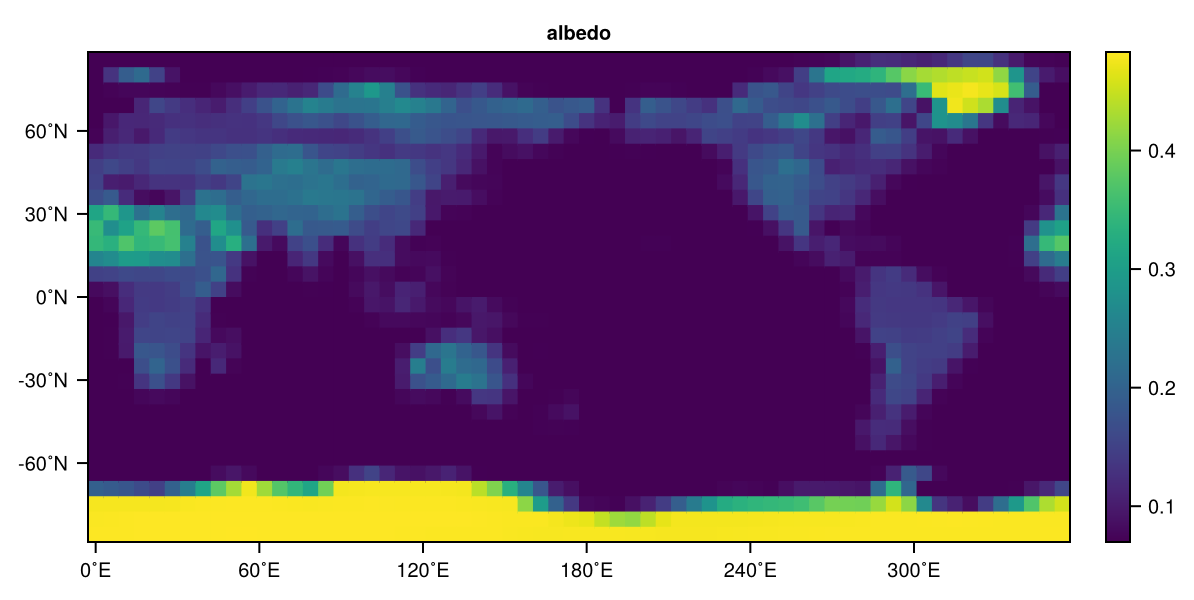

In [6]:
# visualise intial land albedo
alb = simulation.model.albedo.land.albedo
heatmap(alb, title="albedo")

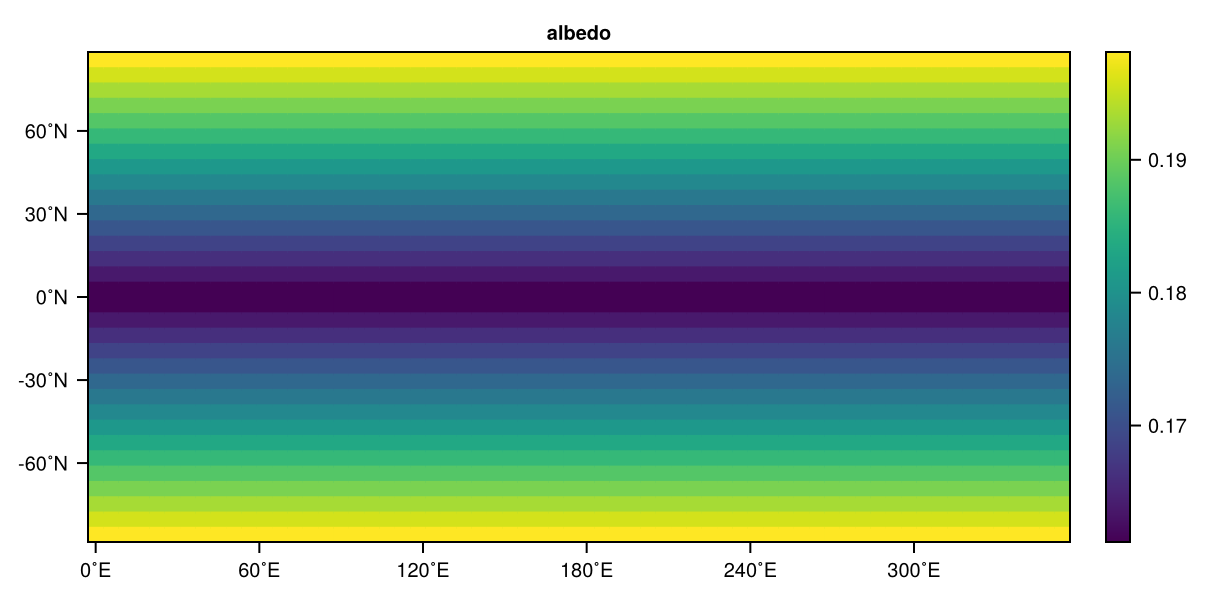

In [7]:
# visualise intial ocean albedo
alb = simulation.model.albedo.ocean.albedo
#heatmap(alb, title="albedo")
alb

In [8]:
# run the simualtion
run!(simulation, period=Day(30*365), output=true)

Weather is speedy: run_Climate_Ocean_Albedo_0001 100% Time: 1:54:07 (378.54 years/day)


Simulation{PrimitiveWetModel}
├ prognostic_variables::PrognosticVariables{...}
├ diagnostic_variables::DiagnosticVariables{...}
└ model::PrimitiveWetModel{...}

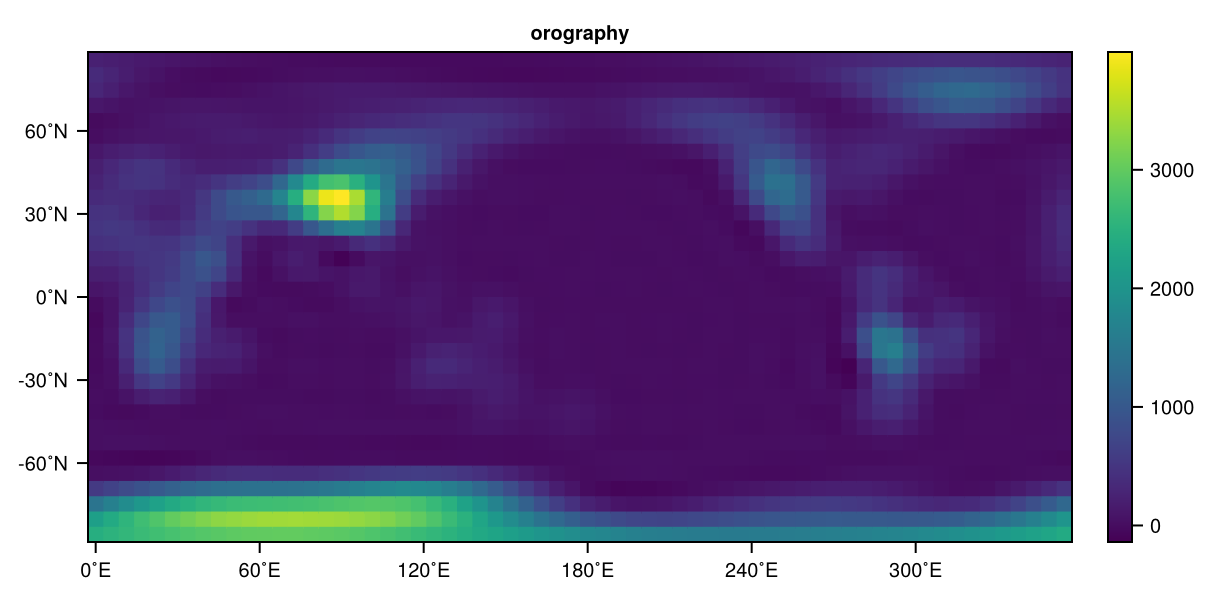

In [9]:
or = simulation.model.orography.orography
heatmap(or, title="orography")

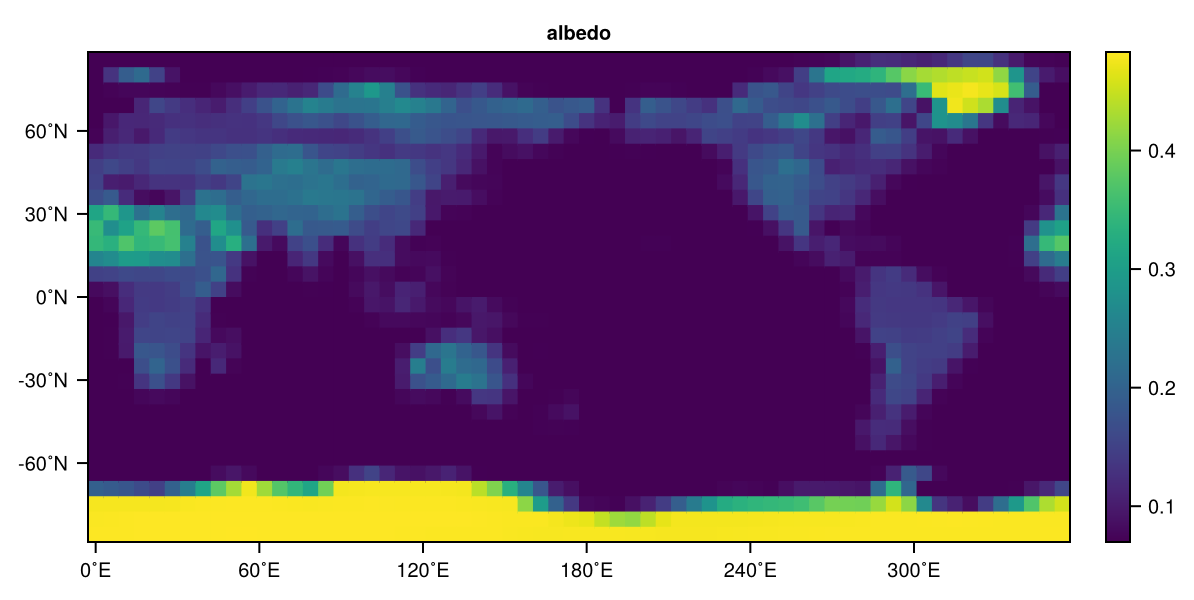

In [10]:
alb = simulation.model.albedo.land.albedo
heatmap(alb, title="albedo")

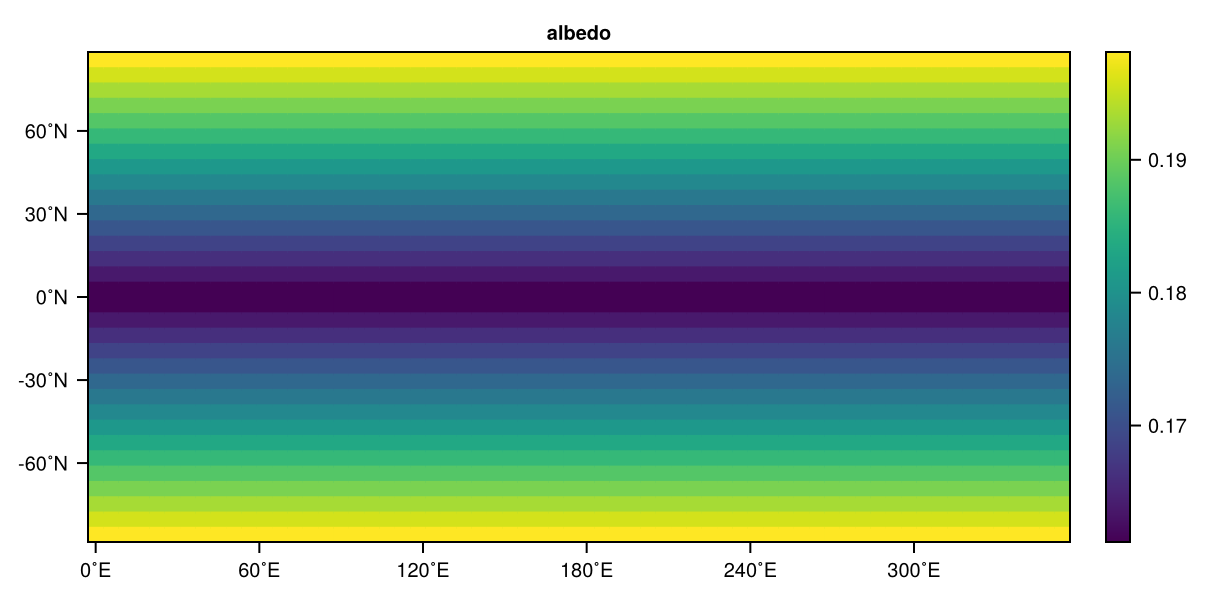

In [11]:
alb = simulation.model.albedo.ocean.albedo
heatmap(alb, title="albedo")

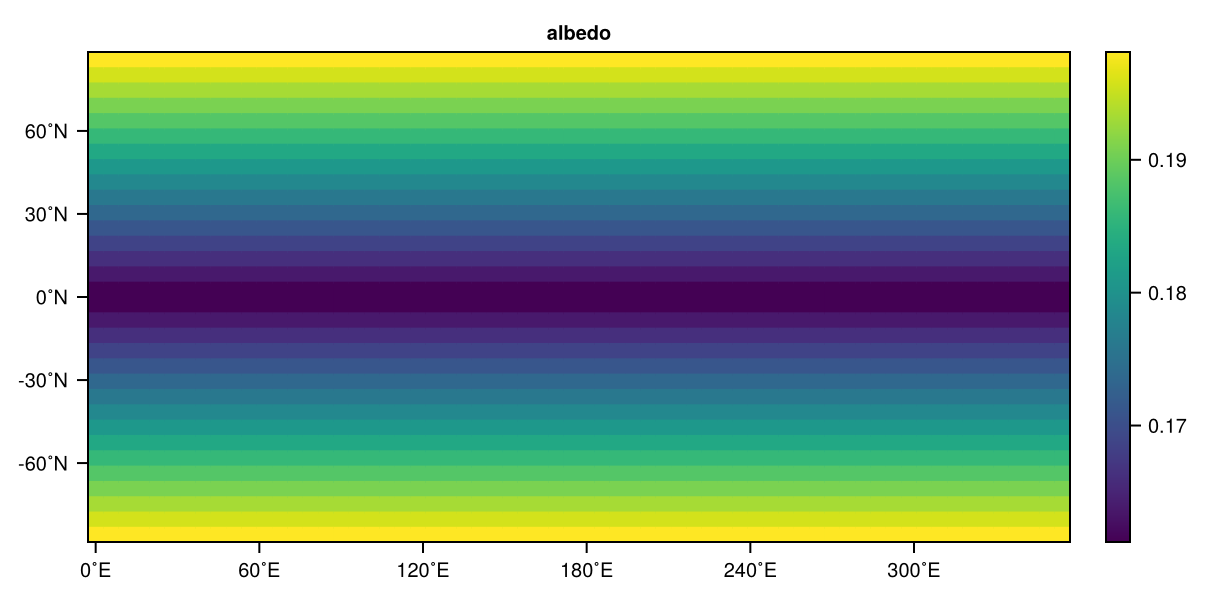

In [12]:
alb = simulation.diagnostic_variables.physics.ocean.albedo
heatmap(alb, title="albedo")

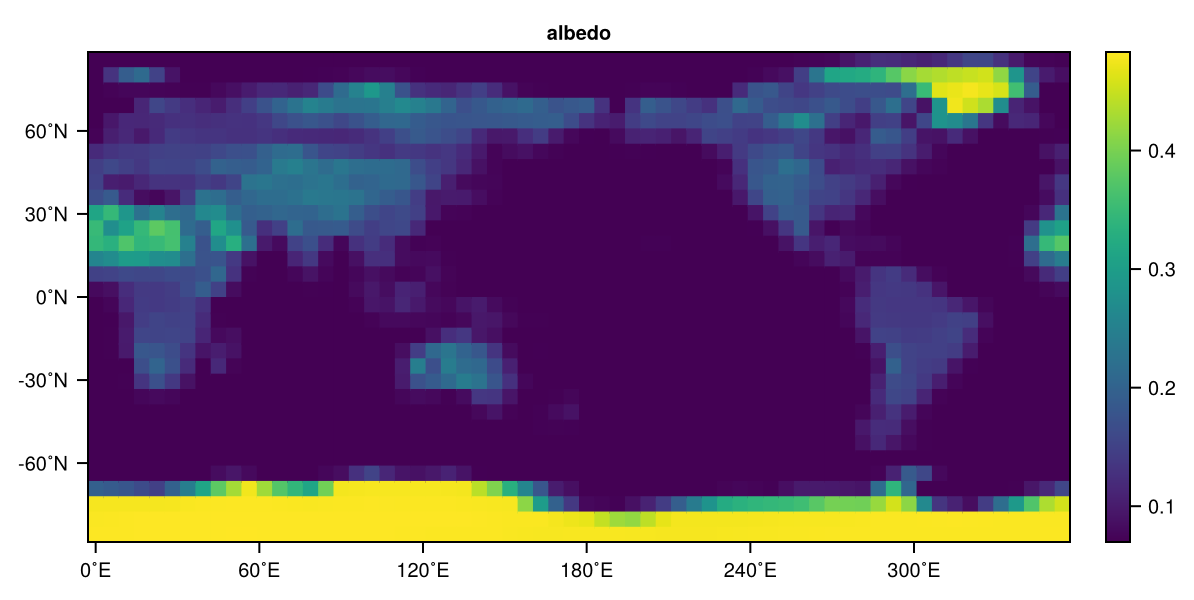

In [13]:
alb_land = simulation.diagnostic_variables.physics.land.albedo
heatmap(alb_land, title="albedo")

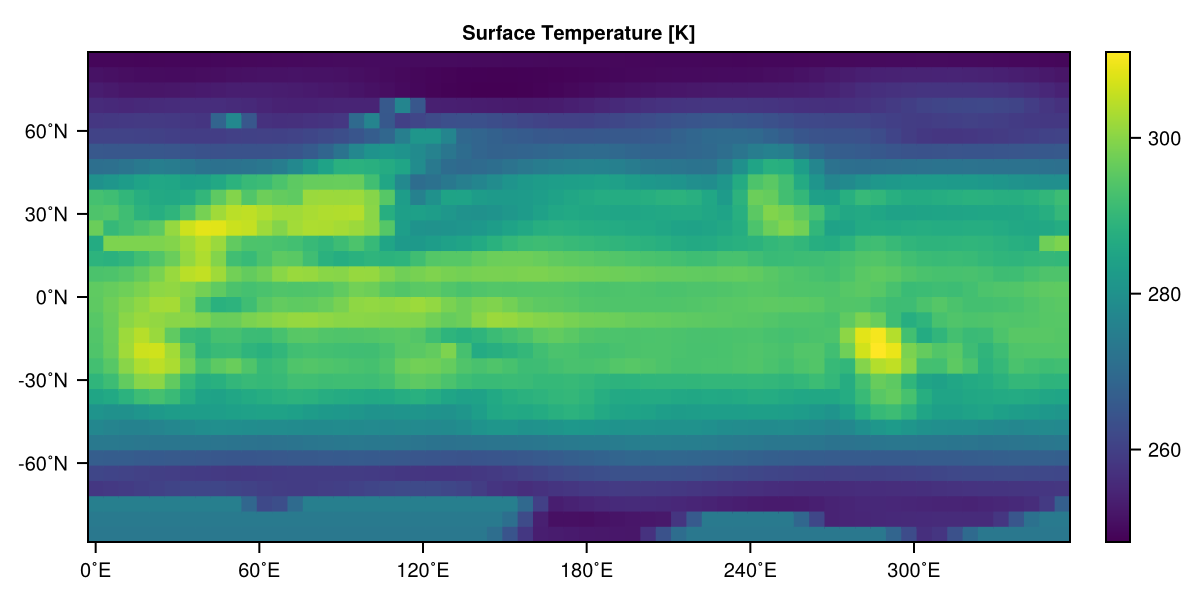

In [14]:
sst = simulation.prognostic_variables.ocean.sea_surface_temperature
heatmap(sst, title="Surface Temperature [K]")

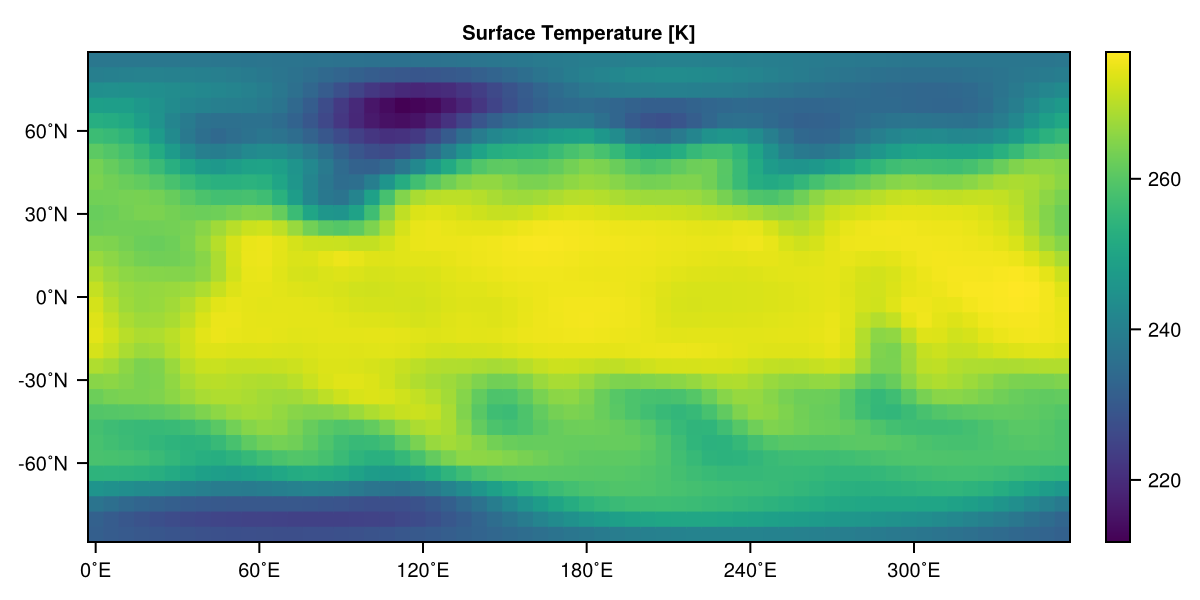

In [15]:
T = simulation.diagnostic_variables.grid.temp_grid[:, 8]
heatmap(T, title="Surface Temperature [K]")

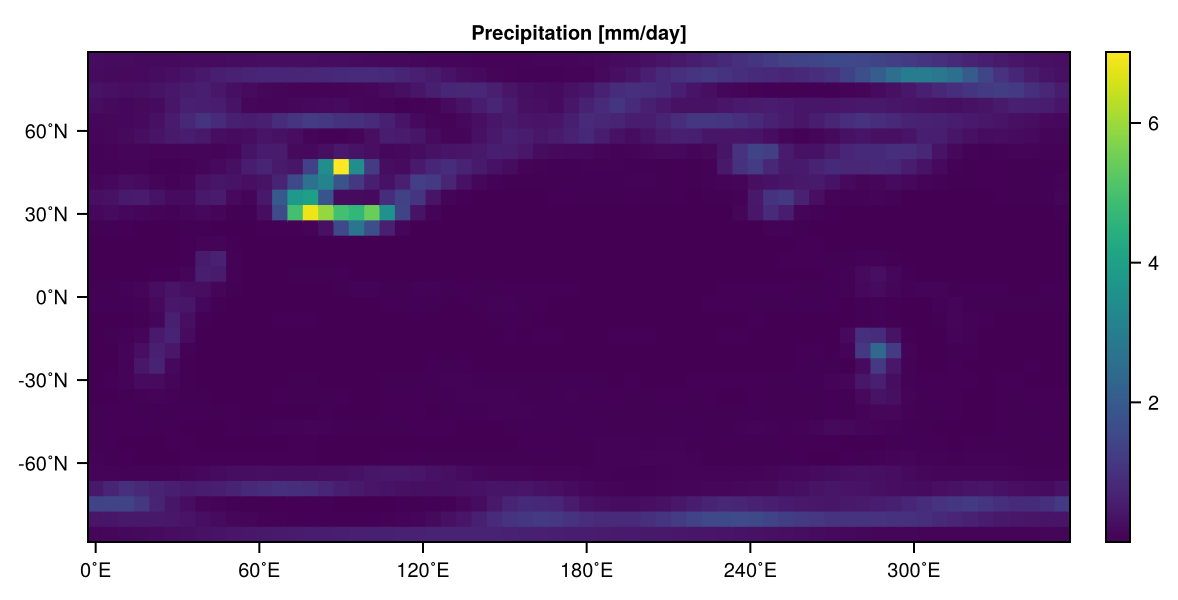

In [16]:
P = simulation.diagnostic_variables.physics.precip_large_scale
heatmap(P, title="Precipitation [mm/day]")

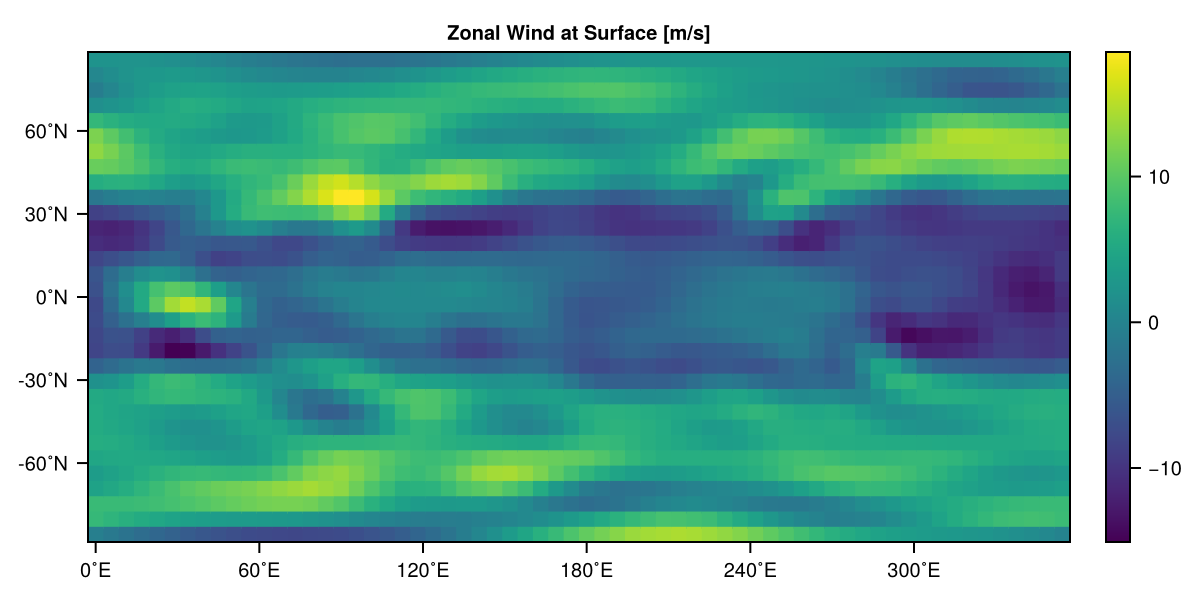

In [17]:
U = simulation.diagnostic_variables.grid.u_grid[:, 8]
heatmap(U, title="Zonal Wind at Surface [m/s]")

## 🧪 Optional Extension: Latitude-Dependent Ocean Albedo
If you’d like to explore more advanced or idealized configurations, you can experiment with latitude-dependent ocean albedo. This allows you to study how spatial patterns in reflectivity influence climate responses.

**🔹 Control Run (Typical Ocean Albedo):**
Set a typical global ocean albedo with a slight increase toward the poles:

`set!(albedo.ocean, (λ, φ) -> 0.06 + 0.04 * abs(φ)/90)`.

**🔸 Perturbed Run (Higher Ocean Albedo)**
Now increase the ocean albedo uniformly to examine its impact:

`set!(albedo.ocean, (λ, φ) -> 0.16 + 0.04 * abs(φ)/90)`. 


**🔧 How to Enable Latitude-Dependent Albedo**

Replace the default albedo setup with a manual specification:

`# 1. Create a ManualAlbedo object`

`manual = ManualAlbedo(spectral_grid)`



`# 2. Create a composite albedo object:`

`#    - Use the manual setup for ocean`

`#    - Keep the default climatology for land`

`albedo = Albedo(ocean=manual, land=AlbedoClimatology(spectral_grid))`

Then, after initializing your model:

`simulation = initialize!(model)`

`# 3. Set your desired latitudinal pattern for ocean albedo`

`#    (φ is latitude in radians)`

`set!(albedo.ocean, (λ, φ) -> 0.06 + 0.04 * abs(φ)/90)`